# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_ride_count = urban_cities_df["ride_id"].count()

suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_ride_count = suburban_cities_df["ride_id"].count()

rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_ride_count = rural_cities_df['ride_id'].count()

In [4]:
# 2. Get the total drivers for each city type
urban_drivers = urban_cities_df["driver_count"].sum()
suburban_drivers = suburban_cities_df["driver_count"].sum()
rural_drivers = rural_cities_df["driver_count"].sum()

In [5]:
#  3. Get the total amount of fares for each city type
urban_fares = urban_cities_df["fare"].sum()
suburban_fares = suburban_cities_df["fare"].sum()
rural_fares = rural_cities_df["fare"].sum()

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_urban_fares = urban_fares / urban_ride_count
avg_suburban_fares = suburban_fares / suburban_ride_count
avg_rural_fares = rural_fares / rural_drivers

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_urban_fares_perdriver = urban_fares / urban_drivers
avg_suburban_fares_perdriver = suburban_fares / suburban_drivers
avg_rural_fares_perdriver = rural_fares / rural_drivers

In [8]:
#  6. Create a PyBer summary DataFrame. 
city_type = ['Urban', 'Suburban','Rural']
total_rides= [urban_ride_count, suburban_ride_count, rural_ride_count]
total_fares = [urban_fares, suburban_fares,rural_fares]
total_drivers = [urban_drivers, suburban_drivers, rural_drivers]
avg_per_ride = [avg_urban_fares, avg_suburban_fares, avg_rural_fares]
avg_per_driver = [avg_urban_fares_perdriver, avg_suburban_fares_perdriver, avg_rural_fares_perdriver]
pyber_summary_df = pd.DataFrame(list(zip(city_type, total_rides, total_fares, total_drivers, avg_per_ride, avg_per_driver)),
                               columns = ['type', 'total rides', 'total fares', 'total drivers', 'average fare per ride', 'average fare per driver'])
pyber_summary_df

,type,total rides,total fares,total drivers,average fare per ride,average fare per driver
0,Urban,1625,39854.38,59602,24.525772,0.668675
1,Suburban,625,19356.33,8570,30.970128,2.258615
2,Rural,125,4327.93,537,8.059460,8.059460


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df['total fares'] = pyber_summary_df['total fares'].map("${:,.2f}".format)

pyber_summary_df['average fare per ride'] = pyber_summary_df['average fare per ride'].map("${:,.2f}".format)

pyber_summary_df['average fare per driver'] = pyber_summary_df['average fare per driver'].map("${:,.2f}".format)

pyber_summary_df

,type,total rides,total fares,total drivers,average fare per ride,average fare per driver
0,Urban,1625,"$39,854.38",59602,$24.53,$0.67
1,Suburban,625,"$19,356.33",8570,$30.97,$2.26
2,Rural,125,"$4,327.93",537,$8.06,$8.06


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
fare_for_type_df = pyber_data_df.groupby(['date','type']).agg({'fare': 'sum'})
fare_for_type_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_for_type_df = pyber_data_df.groupby(['date','type']).agg({'fare': 'sum'})
fare_for_type_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_for_type_df = fare_for_type_df.reset_index()
fare_for_type_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_for_type_df_pivot = fare_for_type_df.pivot(index = 'date', columns = 'type', values = 'fare')
fare_for_type_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
start_date = "2019-01-01"
end_date = "2019-04-29"
after_start_date = fare_for_type_df['date'] >= start_date
before_end_date = fare_for_type_df['date']<= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = fare_for_type_df.loc[between_two_dates]
filtered_dates

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2191,2019-04-28 14:28:36,Urban,11.46
2192,2019-04-28 16:29:16,Urban,36.42
2193,2019-04-28 17:26:52,Urban,31.43
2194,2019-04-28 17:38:09,Suburban,34.87


In [16]:
filtered_dates_pivot = filtered_dates.pivot(index = 'date', columns = 'type', values = 'fare')

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
filtered_dates_pivot.index = pd.to_datetime(filtered_dates_pivot.index)


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
filtered_dates_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
filtered_dates_pivot = filtered_dates_pivot.resample('W').sum()
filtered_dates_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


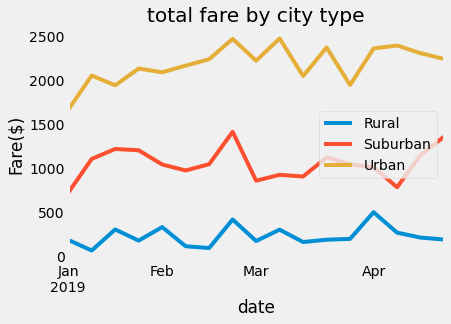

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
filtered_dates_pivot.plot()
plt.title("total fare by city type")
plt.ylabel("Fare($)")
plt.legend()
plt.grid()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#save
plt.savefig("analysis/Farebycity.png")
